### Build Your Own Sentiment Analysis Model

1- Get the stemmed data using the same process you did in Week 3

In [50]:
import pandas as pd

# Starting by importing the data
popData = pd.read_csv('labeledTrainData.tsv', sep='\t')

# Checking that the data is good
popData.head(5)


,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


2- Split this into a training and test set. <br>
3- Fit and apply the tf-idf vectorization to the training set. <br>
4- Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).<br>
&nbsp; I think this is because some of the train data may spoil the test data and cause the test data to reflect a false positive result for optimization. <br>
5- Train a logistic regression using the training data. <br>
6- Find the model accuracy on test set.

In [51]:
# Doing some preprocessin for steps 3 - 5

import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Load the data into a DataFrame
popData = pd.read_csv('labeledTrainData.tsv', sep='\t')
popData = popData[['sentiment', 'review']]

# Convert the "review" column to lowercase
popData['review'] = popData['review'].str.lower()

# Remove punctuation and special characters from the "review" column
popData['review'] = popData['review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Remove stop words from the "review" column
stop_words = stopwords.words('english')
popData['review'] = popData['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Appling the PorterStemmer to the "review" column
porter = PorterStemmer()
popData['review'] = popData['review'].apply(lambda x: ' '.join([porter.stem(word) for word in x.split()]))

# Spliting the data into training and test sets
train_size = int(len(popData) * 0.8)
train_data = popData[:train_size]
test_data = popData[train_size:]

# Fit and apply the tf-idf vectorization to the training set
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['review'].tolist())

# Apply but don't fit the tf-idf vectorization to the test set
X_test_tfidf = tfidf_vectorizer.transform(test_data['review'].tolist())

# Extract the labels for the training and test sets
y_train = np.array(train_data['sentiment'])
y_test = np.array(test_data['sentiment'])

# Train the logistic regression model on the training set
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test_tfidf)

# Calculate the accuracy of the model
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')




Accuracy: 0.8802


In [55]:
# Checking on the cleaned up data to make sure the data frame is intact. 
popData.head(5)

,sentiment,review
0,1,stuff go moment mj ive start listen music watc...
1,1,classic war world timothi hine entertain film ...
2,0,film start manag nichola bell give welcom inve...
3,0,must assum prais film greatest film opera ever...
4,1,superbl trashi wondrous unpretenti 80 exploit ...


7- Create a confusion matrix for the test set predictions.

In [54]:
from sklearn.metrics import confusion_matrix

y_pred = lr_model.predict(X_test_tfidf)
confusion_matrix(y_test, y_pred)


array([[2150,  322],
       [ 277, 2251]], dtype=int64)

8- Create a ROC curve for the test set.

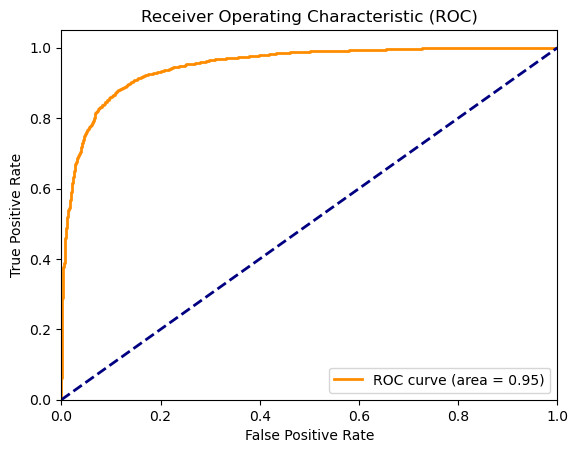

In [56]:
from sklearn.metrics import roc_curve, auc

# Predicted probabilities for the test set
y_pred_proba = lr_model.predict_proba(X_test_tfidf)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


10- Pick another classification model you learned about this week and repeat steps (5) – (9). </br>
&nbsp;&nbsp;&nbsp; Because I am an Netflix dork, I am going to use movie review data for this.


In [1]:
import pandas as pd

# Loading the data into a DataFrame
movieReview = pd.read_csv('IMDB Dataset.csv')

# Converting the "sentiment" column to 0 and 1
movieReview['sentiment'] = (movieReview['sentiment'] == 'positive').astype(int)

# Renaming the columns so it works for the model.
movieReview = movieReview.rename(columns={'sentiment': 'sentiment', 'review': 'review'})

# To help with processing time taking a subset of the data.
movieReview = movieReview.sample(n=25000, random_state=1)
movieReview = movieReview.reset_index(drop=True)

movieReview.head(5)


,review,sentiment
0,With No Dead Heroes you get stupid lines like ...,0
1,I thought maybe... maybe this could be good. A...,0
2,An elite American military team which of cours...,0
3,Ridiculous horror film about a wealthy man (Jo...,0
4,"Well, if you are one of those Katana's film-nu...",1


In [2]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Convertin the "review" column to lowercase
movieReview['review'] = movieReview['review'].str.lower()

# Removin punctuation and special characters from the "review" column
movieReview['review'] = movieReview['review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Removin stop words from the "review" column
stop_words = stopwords.words('english')
movieReview['review'] = movieReview['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Applying the PorterStemmer to the "review" column
porter = PorterStemmer()
movieReview['review'] = movieReview['review'].apply(lambda x: ' '.join([porter.stem(word) for word in x.split()]))

# Splitting the data into training and test sets
train_size = int(len(movieReview) * 0.8)
train_data = movieReview[:train_size]
test_data = movieReview[train_size:]

# Fit and apply the tf-idf vectorization to the training set
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['review'].tolist())

# Applying but DO NOT FIT the tf-idf vectorization to the test set
X_test_tfidf = tfidf_vectorizer.transform(test_data['review'].tolist())

# Extracting the labels for the training and test sets
y_train = np.array(train_data['sentiment'])
y_test = np.array(test_data['sentiment'])

# Train the logistic regression model on the training set
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test_tfidf)

# Calculate the accuracy of the model
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8882


In [3]:
from sklearn.metrics import confusion_matrix

y_pred = lr_model.predict(X_test_tfidf)
confusion_matrix(y_test, y_pred)

array([[2261,  307],
       [ 252, 2180]], dtype=int64)

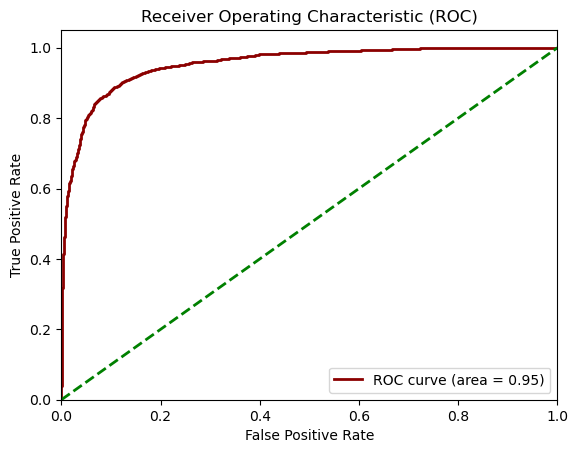

In [6]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the test set
y_pred_proba = lr_model.predict_proba(X_test_tfidf)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkred', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()